In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score, confusion_matrix
from sklearn.preprocessing import normalize
from pprint import pprint

In [63]:
# Import dataset
df = pd.read_csv('./data/features-modified-total.csv')
tag_df = pd.read_csv('./data/tag.csv')
labels = df.columns
df.head()

,is_contributor_anonymous,is_contributor_deleted,time_of_day,day_of_week,is_minor_edit,comment_length,is_comment_deleted,is_previous_same_contributor,time_since_last_article_edit,size_change,size_ratio,tableGeometryChange,tag_id
0,0,0,0,2,1,142,0,0,1485,1782,1.046369,-9.0,12
1,1,0,12,5,0,7,0,1,212,8,1.000020,0.0,12
2,1,0,14,3,0,19,0,1,12454,-1245,0.979904,-9.0,1
3,1,0,14,3,0,19,0,1,12454,-1245,0.979904,-9.0,11
4,0,0,19,7,0,79,0,1,12015,3,1.000020,0.0,12


In [64]:
# Convert from pandas to numpy arrays
X = df.drop(['tag_id'], axis=1)
y = df['tag_id']
X = X.values
y = y.values
feature_labels = df.columns

In [91]:
# Util methods
def get_tag_ids():
    tags = df['tag_id'].unique()
    tags.sort()
    return tags

def get_tag_by_id(tag_id):
    return tag_df[tag_df['id'] == tag_id]['name'].values[0]

def filter_by_tag(y, tag_id):
    return np.array([1 if tag == tag_id else 0 for tag in y])

def cross_validate_model(model, X, y):    
    return cross_validate(model, X, y, 
                          scoring=['precision', 'accuracy', 'f1'],
                          cv=2, return_train_score=False)

def precision_recall_graph(y_test, y_predict):
    precision, recall, thresholds = precision_recall_curve(y_test, y_predict)
    average_precision = average_precision_score(y_test, y_predict)

    plt.title('Precision-Recall: Average Precision=  %0.2f' % average_precision)
    plt.step(recall, precision, color='b', where='post')
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()
    
def confusion_matrx(y_test, y_predict, label):
    # Evaluate model: Confusion matrix
    columns = ['Predicted No ' + label, 'Predicted ' + label]
    index = ['True No ' + label, 'True' + label]

    print('Final model scores:')
    df = pd.DataFrame(confusion_matrix(y_test, y_predict), columns=columns, index=index)
    print(df.head())


In [71]:
# TODO: Normalize
X = normalize(X)

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [84]:
# Build models for every tag
models = dict()

for tag_id in get_tag_ids():
    tag_label = get_tag_by_id(tag_id)
    y_chunk = filter_by_tag(y_train, tag_id)

    print(f'Training model for tag id {tag_id} {tag_label}')
    model = RandomForestClassifier(class_weight='balanced')
    scores = cross_validate_model(model, X_train, y_chunk)
    models[tag_id] = model

Training model for tag id 1 Blanking
Training model for tag id 2 Nonsense
Training model for tag id 3 QualityIssue
Training model for tag id 4 PersonalStory
Training model for tag id 5 FalseFacts
Training model for tag id 6 Syntax
Training model for tag id 8 Template


/Users/philipphager/.local/share/virtualenvs/classifier-EavwNepm/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/philipphager/.local/share/virtualenvs/classifier-EavwNepm/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/philipphager/.local/share/virtualenvs/classifier-EavwNepm/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/philipphager/.local/share/virtualenvs/classifier-EavwNepm/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score 

Training model for tag id 9 EditWars
Training model for tag id 10 SEO
Training model for tag id 11 Intention
Training model for tag id 12 constructive


Train model for tag Blanking


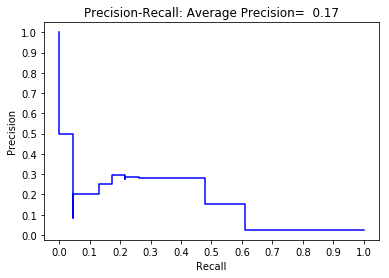

Final model scores:
                  Predicted No Blanking  Predicted Blanking
True No Blanking                    892                  11
TrueBlanking                         22                   1
Train model for tag Nonsense


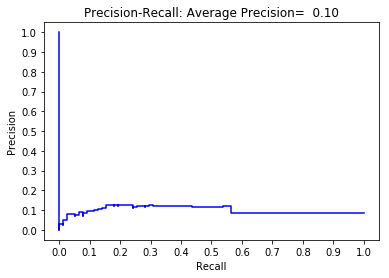

Final model scores:
                  Predicted No Nonsense  Predicted Nonsense
True No Nonsense                    811                  37
TrueNonsense                         76                   2
Train model for tag QualityIssue


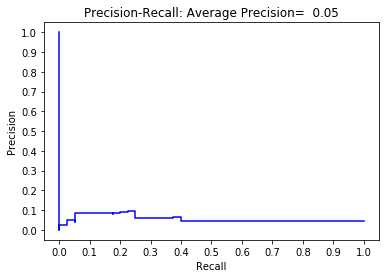

Final model scores:
                      Predicted No QualityIssue  Predicted QualityIssue
True No QualityIssue                        875                      11
TrueQualityIssue                             40                       0
Train model for tag PersonalStory


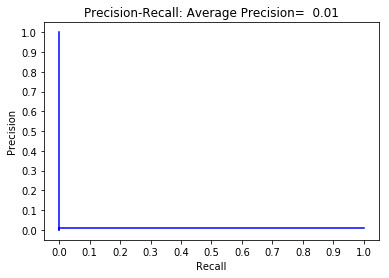

Final model scores:
                       Predicted No PersonalStory  Predicted PersonalStory
True No PersonalStory                         914                        1
TruePersonalStory                              11                        0
Train model for tag FalseFacts


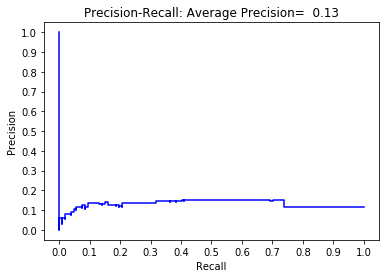

Final model scores:
                    Predicted No FalseFacts  Predicted FalseFacts
True No FalseFacts                      764                    55
TrueFalseFacts                          101                     6
Train model for tag Syntax


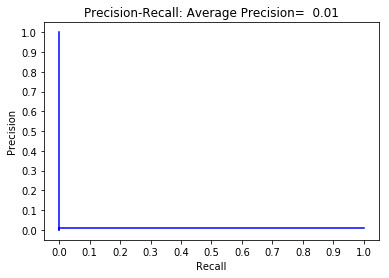

Final model scores:
                Predicted No Syntax  Predicted Syntax
True No Syntax                  914                 4
TrueSyntax                        8                 0
Train model for tag Template


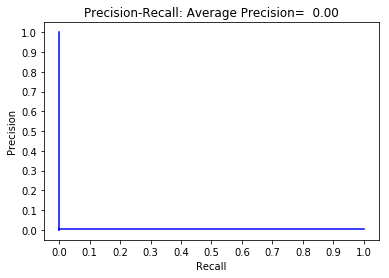

Final model scores:
                  Predicted No Template  Predicted Template
True No Template                    924                   0
TrueTemplate                          2                   0
Train model for tag EditWars


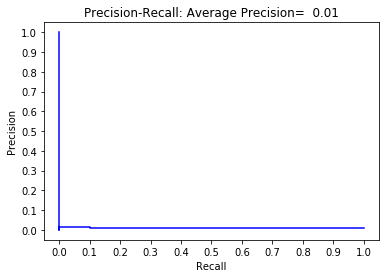

Final model scores:
                  Predicted No EditWars  Predicted EditWars
True No EditWars                    915                   1
TrueEditWars                         10                   0
Train model for tag SEO


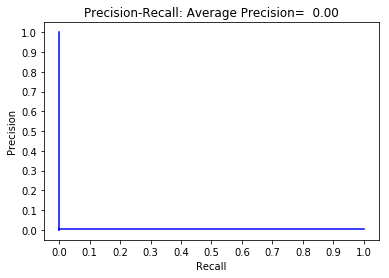

Final model scores:
             Predicted No SEO  Predicted SEO
True No SEO               923              1
TrueSEO                     2              0
Train model for tag Intention


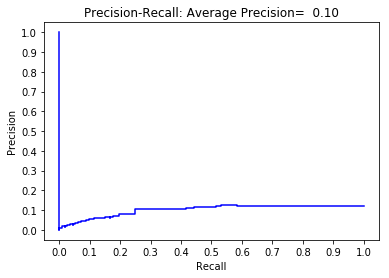

Final model scores:
                   Predicted No Intention  Predicted Intention
True No Intention                     715                   98
TrueIntention                         113                    0
Train model for tag constructive


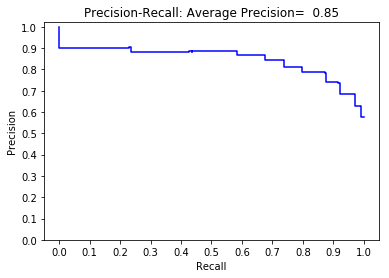

Final model scores:
                      Predicted No constructive  Predicted constructive
True No constructive                        320                      74
Trueconstructive                            140                     392


In [92]:
# Evaluate models:
for tag_id in get_tag_ids():
    label = get_tag_by_id(tag_id)
    print('Train model for tag', label)
    model = models[tag_id]
    y_train_tag = filter_by_tag(y_train, tag_id)
    y_test_tag = filter_by_tag(y_test, tag_id)

    model.fit(X_train, y_train_tag)
    y_predict = model.predict(X_test)
    y_predict_prob = model.predict_proba(X_test)
    y_predict_vandalism = y_predict_prob[:,1]
    precision_recall_graph(y_test_tag, y_predict_vandalism)
    confusion_matrx(y_test_tag, y_predict, label)